In [29]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [30]:
data = pd.read_csv('Customer-Churn.txt')

Lab | Handling Data Imbalance in Classification Models
For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using Customer-Churn.txt file.

Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type  using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic regression model on the training data.
- Check the accuracy on the test data.
- Note: So far we have not balanced the data.

Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [32]:
data['TotalCharges'] = np.where(data['TotalCharges'] == " ", np.nan, data['TotalCharges'])

<Axes: xlabel='TotalCharges', ylabel='Density'>

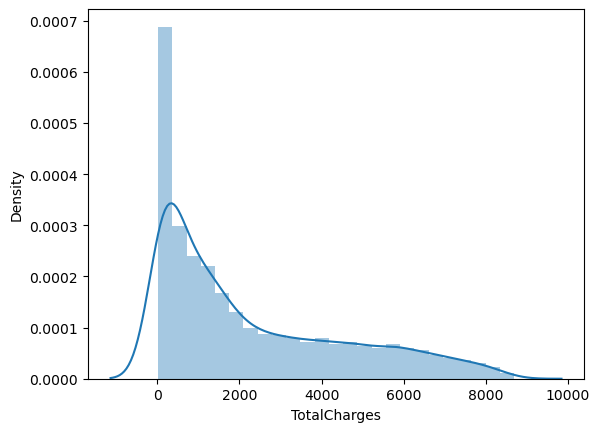

In [33]:
sns.distplot(data['TotalCharges'])

In [34]:
check = data.copy()

In [35]:
check.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
check.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'Churn'], axis=1, inplace = True)

In [37]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TotalCharges  7032 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [38]:
check['TotalCharges'].dropna(inplace = True)

In [39]:
pd.to_numeric(check['TotalCharges']).mean()

2283.3004408418656

In [40]:
pd.to_numeric(check['TotalCharges']).median()

1397.475

In [41]:
#Como la distribución está sesgada hacia la derecha. Rellenaremos los nulls de 'TotalCharges' con la mediana.

In [42]:
data['TotalCharges'].fillna(pd.to_numeric(check['TotalCharges']).median(), inplace = True)

In [43]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [45]:
churndata = data.drop(['gender', 'Partner', 'Dependents',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract'], axis=1)

In [46]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   Churn           7043 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 275.2+ KB


In [47]:
churndata['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [48]:
churndata.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [49]:
col = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

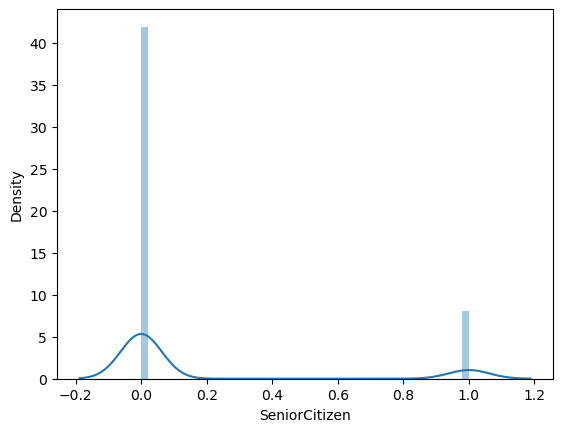

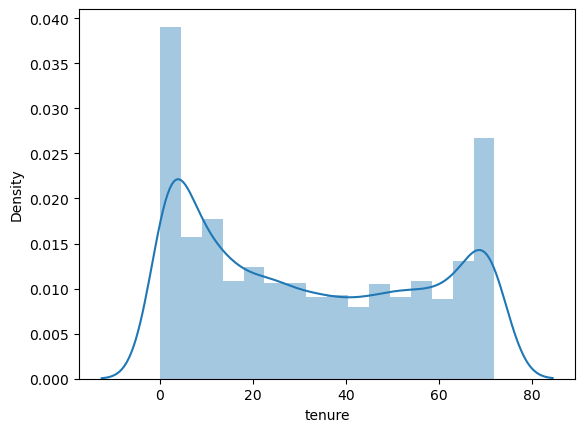

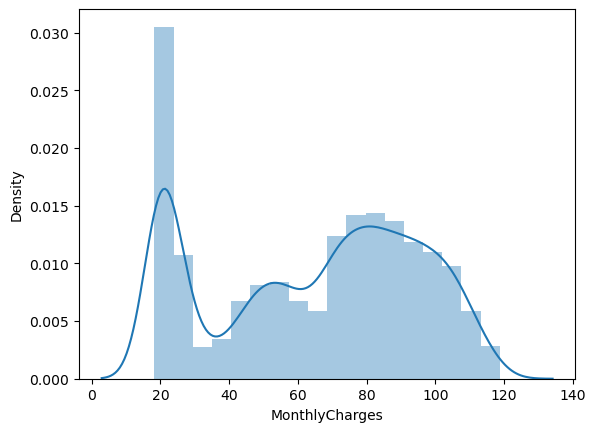

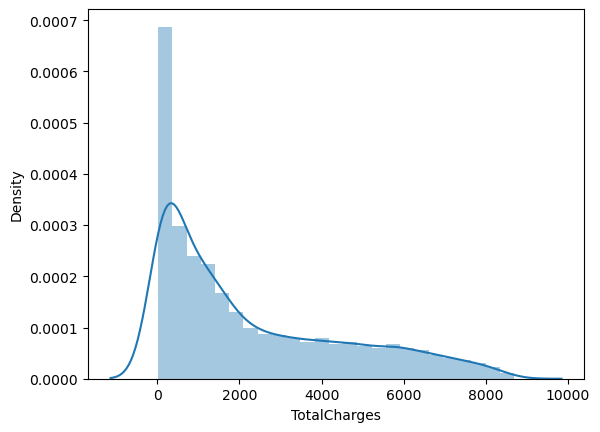

In [50]:
for i in col:
    sns.distplot(churndata[i])
    plt.show()

In [51]:
#Como SeniorCitizen parece ser una categórica, no la normalizaremos.

In [52]:
#Estandarizaremos las otras variables porque tienen escalas bastante dispares 

In [53]:
X_num = churndata.drop(columns=['SeniorCitizen','Churn'])

In [54]:
X_num

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [55]:
transformer=StandardScaler().fit(X_num)
x_normalized=transformer.transform(X_num)
print(x_normalized.shape)
df_normalized = pd.DataFrame(x_normalized, columns=[X_num.columns])

(7043, 3)


In [56]:
df_normalized['SenioCitizen'] = churndata['SeniorCitizen']

In [57]:
df_normalized['Churn'] = churndata['Churn']

In [58]:
df_normalized['Churn'].value_counts()

(Churn,)
No          5174
Yes         1869
Name: count, dtype: int64

In [59]:
#df_normalized['Churn'] = np.where(df_normalized['Churn'] == 'Yes',1,0)

In [60]:
X = df_normalized.drop(columns='Churn')
y = df_normalized.Churn

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify= y,random_state=42)

In [62]:
model= LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [63]:
model.score(X_test, y_test)

0.7842441447835344

In [216]:
## Next steps check for imbalance & apply lo que hemos visto en la notebook 8.5

In [28]:
churndata.to_csv('cleanchurn.csv')

In [64]:
data = pd.read_csv('cleanchurn.csv')

In [65]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [69]:
len(data[data['Churn'] == 'Yes'])/len(data)

0.2653698707936959

In [70]:
#Hay un poco de imbalance en la muestra

# Downsampling

In [71]:
NO = data[data['Churn'] == 'No']
YES = data[data['Churn'] == 'Yes']

In [72]:
NO = NO.sample(len(YES))
print(NO.shape)
print(YES.shape)

(1869, 6)
(1869, 6)


In [73]:
data = pd.concat([NO, YES], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

Churn
No     1869
Yes    1869
Name: count, dtype: int64

In [74]:
X = data.drop(columns='Churn')
y = data.Churn

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify= y,random_state=42)

model= LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7205882352941176

# Upsampling

In [78]:
data = pd.read_csv('cleanchurn.csv')

In [79]:
NO = data[data['Churn'] == 'No']
YES = data[data['Churn'] == 'Yes']

In [80]:
YES = YES.sample(len(NO), replace=True)
print(YES.shape)

(5174, 6)


In [81]:
data = pd.concat([NO, YES], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

Churn
No     5174
Yes    5174
Name: count, dtype: int64

In [82]:
X = data.drop(columns='Churn')
y = data.Churn

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify= y,random_state=42)

model= LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7463768115942029

# Upsampling (SMOTE)

In [83]:
from imblearn.over_sampling import SMOTE

In [85]:
data = pd.read_csv('cleanchurn.csv')

In [86]:
smote = SMOTE()

In [87]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Churn
No     5174
Yes    5174
Name: count, dtype: int64

In [89]:
model.score(X_sm, y_sm)

0.7341515268650947